In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [11]:
df = pd.read_csv("sweetspot_UT_Austin.csv")
print(df.shape)
print(df.columns)

(55, 14)
Index(['Well Number', 'Well Name', 'Bottomhole X', 'Bottomhole Y', 'Co [MSTB]',
       'Cw (bbl)', 'POROS', 'KX', 'KY', 'TD(MD)', 'Cg (mmcf)', 'FACIES',
       'P_2020-1-6', 'P_2029-1-1'],
      dtype='object')


In [13]:
df.head()

,Well Number,Well Name,Bottomhole X,Bottomhole Y,Co [MSTB],Cw (bbl),POROS,KX,KY,TD(MD),Cg (mmcf),FACIES,P_2020-1-6,P_2029-1-1
0,1,PO1_1,5064.04,13746.23,55.191600,1.617450e-04,0.128029,0.020377,0.020377,8551.7,157.119447,3,3491.971374,2992.403113
1,2,PO1_2,7668.40,13746.23,27.529400,1.394790e-04,0.101876,0.015088,0.015088,8579.9,69.831076,4,3501.327981,2947.374808
2,3,PO1_3,2459.67,13746.23,48.354000,1.973990e-04,0.119220,0.022396,0.022396,8557.1,134.781940,4,3493.763065,2904.053641
3,4,PO1_4,10272.76,13746.23,0.572057,1.440000e-07,0.064132,0.000091,0.000091,8635.5,1.101210,5,3519.775759,3301.826052
4,5,PO1_5,12877.11,13746.23,0.430394,8.560000e-08,0.063078,0.000067,0.000067,8718.6,0.435085,5,3547.347889,3365.597401


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Well Number   55 non-null     int64  
 1   Well Name     55 non-null     object 
 2   Bottomhole X  55 non-null     float64
 3   Bottomhole Y  55 non-null     float64
 4   Co [MSTB]     55 non-null     float64
 5   Cw (bbl)      55 non-null     float64
 6   POROS         55 non-null     float64
 7   KX            55 non-null     float64
 8   KY            55 non-null     float64
 9   TD(MD)        55 non-null     float64
 10  Cg (mmcf)     55 non-null     float64
 11  FACIES        55 non-null     int64  
 12  P_2020-1-6    55 non-null     float64
 13  P_2029-1-1    55 non-null     float64
dtypes: float64(11), int64(2), object(1)
memory usage: 6.1+ KB


In [17]:
df.drop(['Well Name','Bottomhole X', 'Bottomhole Y','TD(MD)'], axis = 1, inplace=True)
#dropping the features we belieave that are associate to the process of indentifying the best places to drill well

In [19]:
df.head()

,Well Number,Co [MSTB],Cw (bbl),POROS,KX,KY,Cg (mmcf),FACIES,P_2020-1-6,P_2029-1-1
0,1,55.191600,1.617450e-04,0.128029,0.020377,0.020377,157.119447,3,3491.971374,2992.403113
1,2,27.529400,1.394790e-04,0.101876,0.015088,0.015088,69.831076,4,3501.327981,2947.374808
2,3,48.354000,1.973990e-04,0.119220,0.022396,0.022396,134.781940,4,3493.763065,2904.053641
3,4,0.572057,1.440000e-07,0.064132,0.000091,0.000091,1.101210,5,3519.775759,3301.826052
4,5,0.430394,8.560000e-08,0.063078,0.000067,0.000067,0.435085,5,3547.347889,3365.597401


In [23]:
#check for missing values
df.isnull().sum()
#no missing values in our Sweet Spot data

Well Number    0
Co [MSTB]      0
Cw (bbl)       0
POROS          0
KX             0
KY             0
Cg (mmcf)      0
FACIES         0
P_2020-1-6     0
P_2029-1-1     0
dtype: int64

In [33]:
print(df.describe())
#we can see that both Co and Cg have zeros as their minimum values, which applies dry holes (no production of oil and gas from that reservior)

       Well Number   Co [MSTB]      Cw (bbl)      POROS         KX         KY  \
count     55.00000   55.000000  5.500000e+01  55.000000  55.000000  55.000000   
mean      28.00000   57.156812  5.165370e+00   0.135532   0.027481   0.022876   
std       16.02082   41.965628  1.810904e+01   0.039870   0.018500   0.018372   
min        1.00000    0.000000  8.560000e-08   0.063078   0.000067   0.000067   
25%       14.50000   20.005750  1.088330e-04   0.103001   0.012782   0.006914   
50%       28.00000   47.893000  2.997180e-04   0.135415   0.027701   0.016377   
75%       41.50000  101.864950  4.928820e-04   0.172855   0.042156   0.038371   
max       55.00000  120.743000  9.260200e+01   0.190046   0.058184   0.058151   

        Cg (mmcf)     FACIES   P_2020-1-6   P_2029-1-1  
count   55.000000  55.000000    55.000000    55.000000  
mean   174.045430   3.000000  3487.981393  2790.943485  
std    159.318209   1.427248    27.824736   259.330503  
min      0.000000   1.000000  3451.293359 

In [41]:
#Investigating further -->  extracts all rows that contain at least one zero.
zero_rows_df = df[df.eq(0).any(axis=1)]
print(zero_rows_df)

#observations: 1. Both Co and Cg have zeros in the same wells
#2. When Co and Cg are zero, Cw values are above the mean of Cw, which means water production in well could have decrease the production
#of the reservior --> Assumption: dry holes
#3. Porosity and permeability values are below the mean, suggesting poor resevior conditons 

    Well Number  Co [MSTB]  Cw (bbl)     POROS        KX        KY  Cg (mmcf)  \
7             8        0.0   1.24460  0.074247  0.000270  0.000270        0.0   
8             9        0.0   1.30679  0.073380  0.000284  0.000284        0.0   
26           27        0.0  30.15660  0.116111  0.033130  0.010039        0.0   
27           28        0.0  37.77570  0.112872  0.012573  0.012573        0.0   
46           47        0.0  87.57740  0.143755  0.038000  0.038000        0.0   

    FACIES   P_2020-1-6   P_2029-1-1  
7        5  3520.804323  2949.434450  
8        5  3535.967335  2954.485548  
26       4  3523.060526  2676.168143  
27       4  3523.823653  2694.598799  
46       3  3538.256717  2515.127738  


In [ ]:
#observations: 
#1. Both Co and Cg have zeros in the same wells
#2. When Co and Cg are zero, Cw values are above the mean of Cw, which means water production in well could have decrease the production
#of the reservior --> Assumption: dry holes
#3. Porosity and permeability values are below the mean, suggesting poor resevior conditons 

In [39]:
print(df['Cg (mmcf)'].describe()

count     55.000000
mean     174.045430
std      159.318209
min        0.000000
25%       28.741417
50%      134.781940
75%      306.219399
max      494.772320
Name: Cg (mmcf), dtype: float64


In [ ]:
#Interpretation:
# The measures of central tendency are given by the mean (174.045430) and median (50% value - 134.78)
# The measure of dispersion is given by the standard deviation given by std (159.3182)
# The IQR is the difference beetween 75th and 25th percentile = 494.772320 - 28.741417 = 466.030903

In [43]:
df['Cg (mmcf)'].skew()
#Since the skweness is between 0.5 to 1, this means the data is moderately skewed.
#the right tail is longer, meaning there are some high values pulling the mean to the right

0.5038220159745699

/var/folders/7c/_q0md75x519442_f4lkwgnl80000gn/T/ipykernel_10253/4227812113.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Cg (mmcf)"])


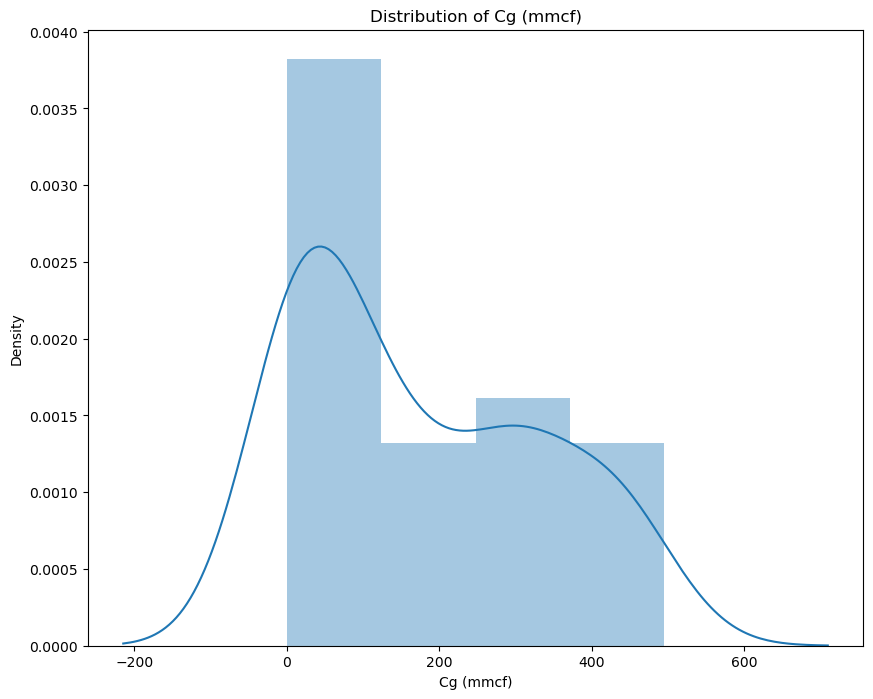

In [45]:
plt.figure(figsize= (10,8))
sns.distplot(df["Cg (mmcf)"])
plt.title("Distribution of Cg (mmcf)")
plt.show()

In [ ]:
#The distribution appears to be positively skewed (right-skewed). 
#This means that most of the data points are concentrated on the left side, while a few higher values extend toward the right.
#The long tail on the right suggests some extreme high values (outliers

In [47]:
df['Cg (mmcf)'].kurt()
#The value indicates that it is a Platykurtic curve. It has shorter, thicker tails than normal distrubtion, meaning they have fewer extreme values 
#Low frequence of outliers than nromal distributions
#unlikey to produce extreme reuslts 

-1.1714669536781033

In [60]:
correlation = df.corr()
correlation['Cg (mmcf)'].sort_values(ascending=False)

Cg (mmcf)      1.000000
POROS          0.883273
KX             0.865399
KY             0.808880
Co [MSTB]      0.547533
Well Number    0.005530
Cw (bbl)      -0.292388
P_2029-1-1    -0.724184
P_2020-1-6    -0.763316
FACIES        -0.900778
Name: Cg (mmcf), dtype: float64

In [ ]:
#the correlation table above, it shows that porosit, permeability, and oil production have strong correlation with gas production 
#there's no correlation between well number and Cg, which makes sense.

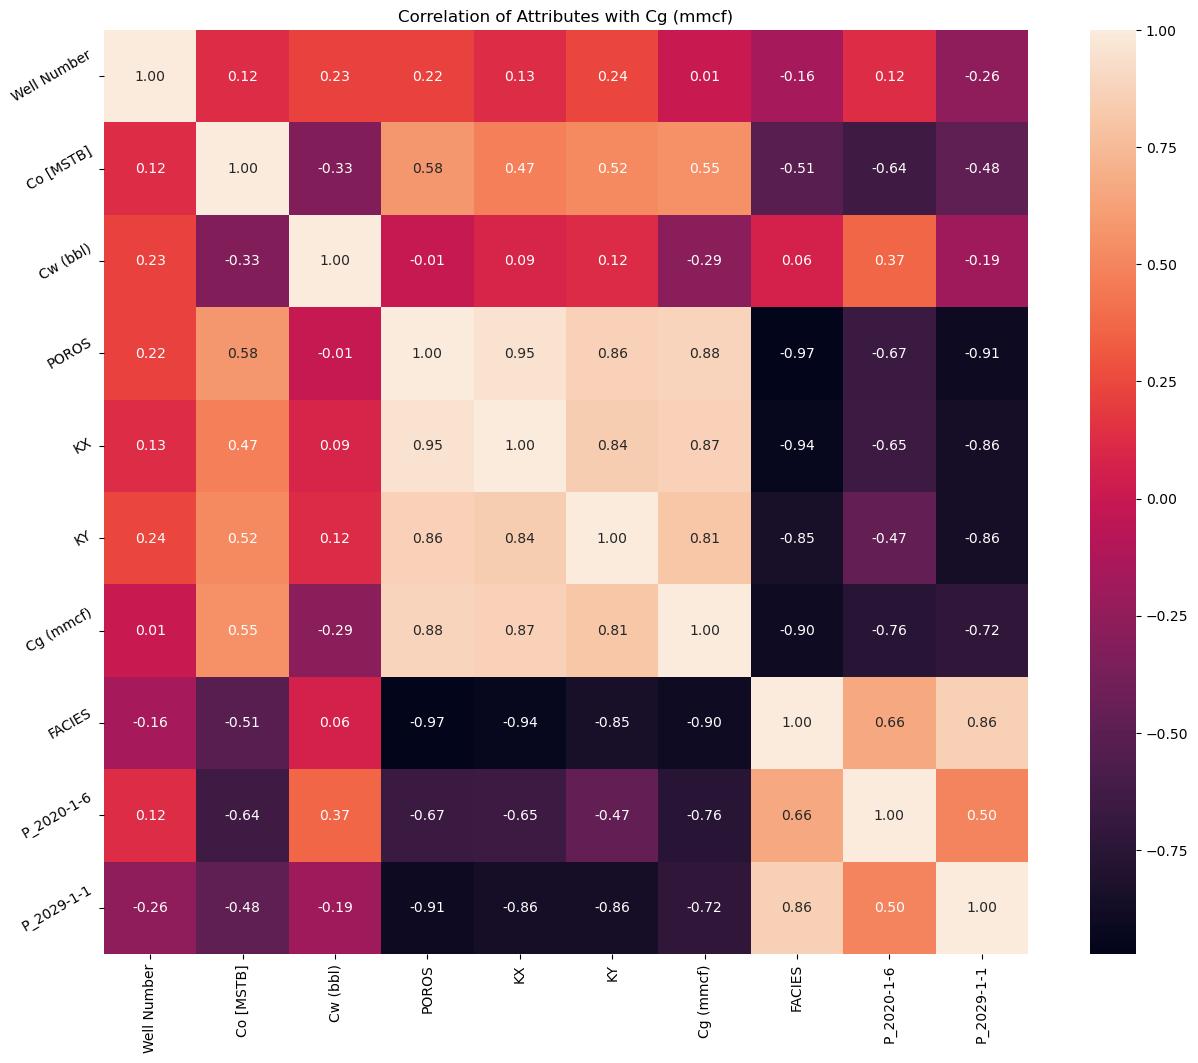

In [62]:
plt.figure(figsize=(16,12))
plt.title('Correlation of Attributes with Cg (mmcf)')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [ ]:
num_var = ['Cg (mmcf)', 'Cw (bbl)', 'POROS', 'KX', 'KY', 
           'FACIES', 'Co [MSTB]','P_2029-1-1','P_2020-1-6']
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()